In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Read datasets
#### 1. Import user and order user data

In [37]:
user_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_Data/user_info.csv',low_memory=False)
o2o_user_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_Data/o2o_user_info.csv',low_memory=False)
orders_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_Data/o2o_orders.csv',low_memory=False)
merchant_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_data/o2o_merchant_info.csv',encoding='utf_8_sig',low_memory=False)
browse_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_data/o2o_browse_history.csv',encoding='utf_8_sig',low_memory=False)
user_login_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_data/user_login_log.csv',encoding='utf_8_sig',low_memory=False)

In [38]:
order_income_df=pd.read_csv('C:/Users/corri/Desktop/Academic/Capstone Project/Project_data/o2o_order_income_detail .csv',encoding='utf_8_sig',low_memory=False)

Join tables together
1) Use O2O user table as the main table
2) Join with user information
3) Join with order information
4) Join with merchant information
5) Join with browse history
6) Join with user type information


In [114]:
# Join o2o_user_df with user_df for complete user info
user_join_df=pd.merge(o2o_user_df,user_df,on='user_id',how='inner')
user_join_df.shape

(39858, 50)

In [115]:
# Check column names
list(user_join_df.columns)

['id_x',
 'user_id',
 'user_phone_x',
 'register_time_x',
 'register_from',
 'recommend_user_id',
 'recommend_merchant_id',
 'provincial',
 'municipal',
 'region',
 'is_provincial_agency',
 'is_municipal_agency',
 'is_region_agency',
 'is_waiter',
 'is_merchant',
 'create_time',
 'update_time',
 'creator',
 'updater_x',
 'first_login_time',
 'bu_wallet_token',
 'register_channel',
 'id_y',
 'user_phone_y',
 'login_password',
 'deal_password',
 'realname',
 'nickname',
 'user_type',
 'sex',
 'identity',
 'birthday',
 'recommend_id',
 'frozen_state',
 'exception_state',
 'idcard',
 'email',
 'register_time_y',
 'usual_address',
 'authentication_state',
 'head_img',
 'createtime',
 'cteator',
 'updatetime',
 'updater_y',
 'jww_id',
 'register_type',
 'last_login',
 'is_first_login',
 'is_one_pass']

In [117]:
# drop columns
user_join_df=user_join_df.drop(['id_y','creator','updater_x','create_time','update_time','updatetime','cteator','updater_y','createtime','register_time_y','login_password','deal_password'],axis=1)

In [141]:
# Join browse information with user info
browse_user_df=pd.merge(browse_df,user_join_df,on='user_id',how='outer')

In [142]:
list(browse_user_df.columns)

['id',
 'user_id',
 'type',
 'entity_id',
 'browse_time',
 'is_remove',
 'create_time',
 'id_x',
 'user_phone_x',
 'register_time_x',
 'register_from',
 'recommend_user_id',
 'recommend_merchant_id',
 'provincial',
 'municipal',
 'region',
 'is_provincial_agency',
 'is_municipal_agency',
 'is_region_agency',
 'is_waiter',
 'is_merchant',
 'first_login_time',
 'bu_wallet_token',
 'register_channel',
 'user_phone_y',
 'realname',
 'nickname',
 'user_type',
 'sex',
 'identity',
 'birthday',
 'recommend_id',
 'frozen_state',
 'exception_state',
 'idcard',
 'email',
 'usual_address',
 'authentication_state',
 'head_img',
 'jww_id',
 'register_type',
 'last_login',
 'is_first_login',
 'is_one_pass']

In [143]:
# Drop columns
browse_user_df=browse_user_df.drop(['id','id_x','create_time'],axis=1)

In [252]:
# Join merged user info with order information
user_order_df=pd.merge(browse_user_df,orders_df,left_on='user_id',right_on='buyer_id',how='right')

In [253]:
# Check dimensions
user_order_df.shape

(1950615, 79)

In [255]:
# Drop unnecessary columns
user_order_df=user_order_df.drop(['id','update_time','create_time','user_phone_x','user_phone_y'],axis=1)

In [183]:
# Merge with merchants information
user_order_merchant_df=pd.merge(user_order_df,merchant_df,on='merchant_id',how='left')

In [184]:
# Check dimensions
user_order_merchant_df=user_order_merchant_df.drop_duplicates()

In [185]:
user_order_merchant_df.shape

(1607546, 145)

In [131]:
# Drop unnecessary columns
user_order_merchant_df=user_order_merchant_df.drop(['id','update_time','create_time'],axis=1)

In [174]:
len(user_order_df['merchant_id'].unique().tolist())

4358

In [151]:
merchant_df.describe(include='all')

,id,merchant_id,merchant_user,merchant_name,region_partner_id,merchant_entity,entity_idcard,entity_phone,license_name,license_no,...,is_settle_public,close_time,is_issue_bu,pct_type,is_open_bu_deduct,is_pay_approve,pay_open_status,pay_open_message,append_step,pay_open_time
count,8611,8610,8610,8598,8597,7939,7939,7680,7885,7886,...,7272.0,68,841.0,7603.000000,8608.000000,8608.000000,8608.0,0.0,1784.000000,0.0
unique,8611,8610,8400,8334,443,7277,7673,7498,7757,7755,...,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21713,SH00020307,13055294824,123,20180312001001504947,李娜,370721196805152775,13123375691,营业执照,请编辑,...,NaN,6/27/2019 09:05:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,8,895,9,4,4,6,7,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,1.399579,0.022537,0.827835,0.0,NaN,6.764013,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.489844,0.148431,0.377546,0.0,NaN,1.039773,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,1.000000,0.000000,0.000000,0.0,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,1.000000,0.000000,1.000000,0.0,NaN,7.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,1.000000,0.000000,1.000000,0.0,NaN,7.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,1.0,2.000000,0.000000,1.000000,0.0,NaN,7.000000,NaN


In [236]:
list(user_join_df)

['id_x',
 'user_id',
 'user_phone_x',
 'register_time_x',
 'register_from',
 'recommend_user_id',
 'recommend_merchant_id',
 'provincial',
 'municipal',
 'region',
 'is_provincial_agency',
 'is_municipal_agency',
 'is_region_agency',
 'is_waiter',
 'is_merchant',
 'first_login_time',
 'bu_wallet_token',
 'register_channel',
 'user_phone_y',
 'realname',
 'nickname',
 'user_type',
 'sex',
 'identity',
 'birthday',
 'recommend_id',
 'frozen_state',
 'exception_state',
 'idcard',
 'email',
 'usual_address',
 'authentication_state',
 'head_img',
 'jww_id',
 'register_type',
 'last_login',
 'is_first_login',
 'is_one_pass']

In [265]:
user_order_df['birthday'] = pd.to_datetime(user_order_df['birthday'])

In [266]:
user_order_df['Age']=(datetime.today()-user_order_df['birthday']).astype('<m8[Y]')

In [267]:
user_order_df['Age'].describe()

count    49416.000000
mean        33.957281
std          9.244662
min          0.000000
25%         29.000000
50%         33.000000
75%         40.000000
max         99.000000
Name: Age, dtype: float64

In [269]:
user_order_df['Age_Group']=pd.cut(user_join_df['Age'], bins=[0,20, 29, 39, 49,59])

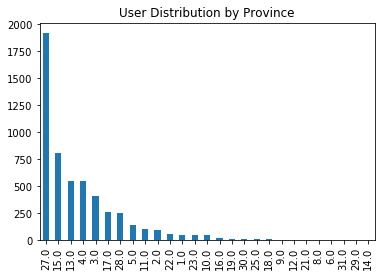

In [237]:
pd.value_counts(user_join_df['provincial']).plot.bar(title='User Distribution by Province')
plt.show()

In [239]:
pd.value_counts(user_join_df['provincial'])/sum(pd.value_counts(user_join_df['provincial']))

27.0    0.353158
15.0    0.149328
13.0    0.101270
4.0     0.101086
3.0     0.076597
17.0    0.047873
28.0    0.046584
5.0     0.027067
11.0    0.018965
2.0     0.018229
22.0    0.011600
1.0     0.009206
23.0    0.009022
10.0    0.008654
16.0    0.004419
19.0    0.003130
30.0    0.002394
25.0    0.002210
18.0    0.001657
9.0     0.001473
12.0    0.001473
21.0    0.001473
8.0     0.001105
6.0     0.001105
31.0    0.000552
29.0    0.000184
14.0    0.000184
Name: provincial, dtype: float64

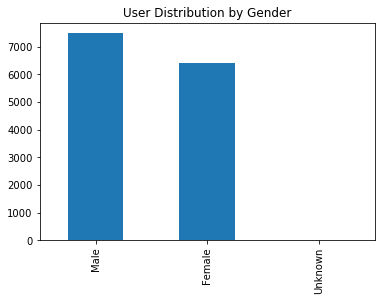

In [240]:
gender_plot=pd.value_counts(user_join_df['sex']).plot.bar(title='User Distribution by Gender')
gender_labels= ['Male','Female','Unknown']
gender_plot.set_xticklabels(gender_labels)
plt.show()

In [241]:
pd.value_counts(user_join_df['sex'])/sum(pd.value_counts(user_join_df['sex']))

0.0    0.537335
1.0    0.460870
2.0    0.001795
Name: sex, dtype: float64

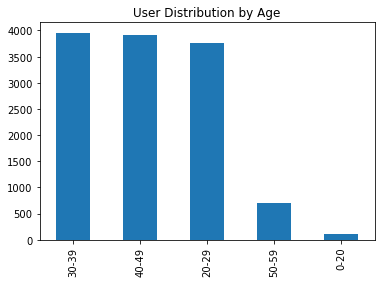

In [246]:
Age_plot=pd.value_counts(user_join_df['Age_Group']).plot.bar(title='User Distribution by Age')
Age_labels= ['30-39','40-49','20-29','50-59','0-20']
Age_plot.set_xticklabels(Age_labels)
plt.show()

In [247]:
pd.value_counts(user_join_df['Age_Group'])/sum(pd.value_counts(user_join_df['Age_Group']))

(29, 39]    0.318069
(39, 49]    0.314694
(49, 59]    0.302242
(20, 29]    0.055756
(0, 20]     0.009239
Name: Age_Group, dtype: float64

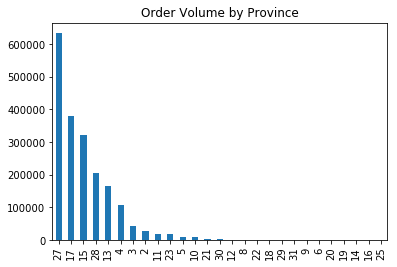

In [262]:
order_by_geography=pd.value_counts(user_order_df['provincial_id']).plot.bar(title='Order Volume by Province')
plt.show()

In [248]:
pd.value_counts(user_order_df['provincial_id'])/sum(pd.value_counts(user_order_df['provincial_id']))

27.0    0.338666
17.0    0.229485
15.0    0.157491
28.0    0.081204
13.0    0.070276
4.0     0.065514
3.0     0.024279
23.0    0.009081
11.0    0.008660
2.0     0.007726
10.0    0.004006
5.0     0.002361
30.0    0.000509
8.0     0.000220
21.0    0.000131
12.0    0.000100
29.0    0.000096
22.0    0.000086
9.0     0.000051
31.0    0.000028
19.0    0.000013
20.0    0.000007
6.0     0.000005
25.0    0.000003
18.0    0.000001
Name: provincial_id, dtype: float64

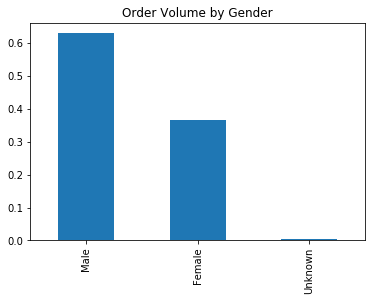

In [260]:
order_by_gender=pd.value_counts(user_order_df['sex'],normalize=True).plot.bar(title='Order Volume by Gender')
gender_labels= ['Male','Female','Unknown']
order_by_gender.set_xticklabels(gender_labels)
plt.show()

In [258]:
pd.value_counts(user_order_df['sex'])/sum(pd.value_counts(user_order_df['sex']))

0.0    0.629391
1.0    0.366158
2.0    0.004451
Name: sex, dtype: float64

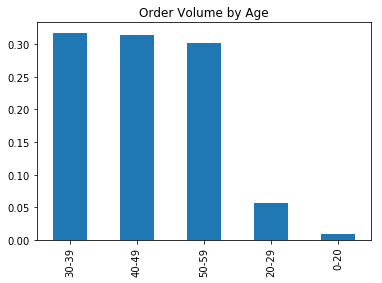

In [273]:
order_by_age=pd.value_counts(user_order_df['Age_Group'],normalize=True).plot.bar(title='Order Volume by Age')
Age_labels= ['30-39','40-49','50-59','20-29','0-20']
order_by_age.set_xticklabels(Age_labels)
plt.show()

In [271]:
pd.value_counts(user_order_df['Age_Group'])/sum(pd.value_counts(user_order_df['Age_Group']))

(29, 39]    0.318069
(39, 49]    0.314694
(49, 59]    0.302242
(20, 29]    0.055756
(0, 20]     0.009239
Name: Age_Group, dtype: float64